<center><bold><span style="font-size: 3em;">Linear Regression</span></bold></center>

In [35]:
import numpy as np
import pandas as pd

In [36]:
hr = pd.read_csv('housing3.csv')

In [37]:
hr.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,gulshan
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,mohakhali
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,bashundhara
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,bashundhara
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,azimpur
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,semi-furnished,banani
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,semi-furnished,gulshan
7,10150000,16200,5,3,2,yes,no,no,no,no,0,unfurnished,banasree
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,furnished,banani
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,unfurnished,banani


# Check for null values

In [38]:
hr.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,locality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Find how many null values are there in each column


In [39]:
hr.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Exploratory Data Analysis

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Check area vs price plot

#### Create a scatterplot of area vs price

Text(0, 0.5, 'price')

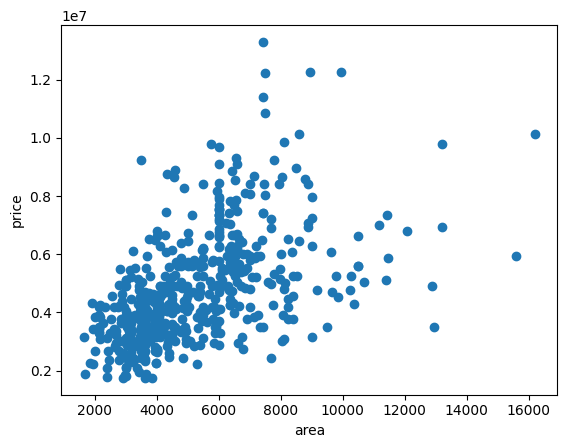

In [41]:
plt.scatter(hr['area'], hr['price'])
plt.xlabel('area')
plt.ylabel('price')

### Check prices for houses near the main road

#### hue: vector or key in data
Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

# Cost Function
### We want to minimize the following cost function

## Formula for Single Variable Linear Regression
<br>
<hr>
<center><bold><i><span style="font-size: 3em;">Y = A + BX</span></i></bold></center>


![Formula](formula2.png)

In [42]:
sx = hr['area'].sum().astype(float)
sy = hr['price'].sum().astype(float)
sxy = (hr['area'] * hr['price']).sum().astype(float)
sx2 = (hr['area'] * hr['area']).sum().astype(float)
n = hr['area'].size

### Intercept (A)

In [43]:
a = (sy*sx2 - sx*sxy) / (n*sx2 - sx*sx)

In [44]:
a

np.float64(2387308.482396426)

### Coefficient (B)

In [45]:
b = (n*sxy - sx*sy) / (n*sx2 - sx*sx)

In [46]:
b

np.float64(461.97489427278344)

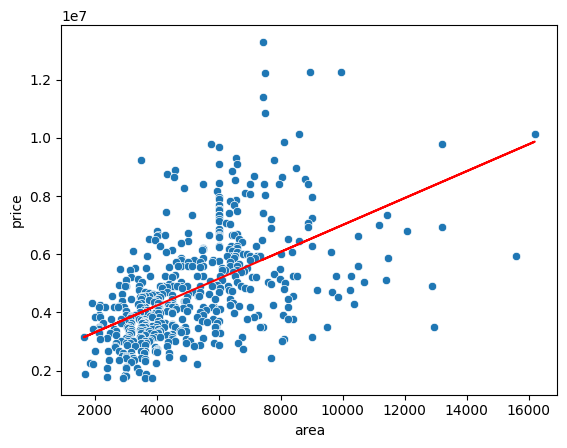

In [60]:
sns.scatterplot(x='area', y='price', data=hr);
plt.plot(hr['area'], hr['area']*b+a, color='r');

## Using SKLearn

In [48]:
from sklearn.linear_model import LinearRegression

####  Create a model instance

In [49]:
LRModel = LinearRegression()

### Fit data using the model

In [50]:
LRModel.fit(hr[['area']], hr['price'])

LinearRegression()

### Show the coefficients

In [51]:
LRModel.coef_

array([461.97489427])

In [52]:
LRModel.intercept_

np.float64(2387308.4823964303)

## Same values obtained as before

### How do we use this model? We can use it to predict prices of unknown houses

In [53]:
LRModel.predict([[1000]])

d:\Intro_to_AI-BKIAC-main\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2849283.37666921])

### We have predicted the price of a 1000 square feet house.

# How to evaluate our model?
- **Split data into training and test data**
- **Train model using training data**
- **Evaluate using test data**

In [54]:
from sklearn.model_selection import train_test_split

### Copy the dataframe into X, but drop the price column

### Copy only the price column in y

### Split the data into training and test sets


In [55]:
X.shape

NameError: name 'X' is not defined

In [ ]:
X_train.shape

In [ ]:
y_train.shape

### Fit the model again, only use 'area' from X

In [ ]:
LRModel.coef_

In [ ]:
LRModel.intercept_

### Make predictions using the model on X_test

### Visulize both true and predicted y values on the test set

In [ ]:
plt.plot(X_test['area'], ypred, color='r');
plt.scatter(X_test['area'], y_test);

## Evaluating our model

### We define two helpful functions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, r2_score

In [ ]:
def eval(model, X_train, y_train, X_test, y_test):
    print("The training score is,", model.score(X_train, y_train), end='\n')
    print("The testing score is,", model.score(X_test, y_test))

In [ ]:
def metric_score(y_test, ypred):
    print("The mean absolute error is: ", mean_absolute_error(y_test, ypred))
    print("The mean squared error is: ", mean_squared_error(y_test, ypred))
    print("The R2 score is: ", r2_score(y_test, ypred)) 

#### Use the functions now

In [ ]:
eval(LRModel, X_train[['area']], y_train, X_test[['area']], y_test)

In [ ]:
metric_score(y_test, ypred)

## Interpretation of R-Squared
The most common interpretation of r-squared is how well the regression model explains observed data. For example, an r-squared of 60% reveals that 60% of the variability observed in the target variable is explained by the regression model. Generally, a higher r-squared indicates more variability is explained by the model.

# Using multiple features: Multiple Regresssion

# More exploratory data anlaysis

## # of bedrooms vs price: boxplot

#### Create a boxplot, showing relation between number of bedrooms and the price

Houses with 4 to 5 bedrooms are the most expensive.

## parking vs price: boxplot

#### Create a boxplot showing relation between parking status and price

Houses with 2 parking spots are the most expensive.

## Furnishing vs price: violin plot

Unfurnished houses are the most economical.

## Correlation between 2 attributes

### Area, bathrooms, stories have great impact on the price

## View the datatypes in our dataset

In [ ]:
hr.head(5)

#### We need to turn the objects into numeric values

### Let us first create a task, we want to predict the price of this house

In [ ]:
task = [7000, 2, 2, 2, 'no', 'yes', 'no', 'no', 'yes', 1, 'furnished', 'mohakhali']

In [ ]:
hr2 = pd.read_csv('housing3.csv')

In [ ]:
hr2.columns

In [ ]:
hr2.columns[1:]

In [ ]:
taskdf = pd.DataFrame([task], columns=hr2.columns[1:])

In [ ]:
taskdf

# How to use categorical features?

## We can label them using numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

 ####  An example first

In [ ]:
hr['furnishingstatus'].unique()

#### Encode the column

In [ ]:
lb = LabelEncoder()
lb.fit_transform(hr['furnishingstatus'])[:10]

In [ ]:
hr['furnishingstatus'].head(10)

### furnished -> 0
### semi-furnished -> 1
### furnished -> 2

#### How do we encode all such columns?

#### We will use a loop

In [ ]:
lb_encoders = {}

In [ ]:
label_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

In [ ]:
hr[label_columns].head(5)

In [ ]:
for i in label_columns:
    pass

In [ ]:
hr.head(5)

### We also need to transform the input data that will be used for prediction

In [ ]:
taskdf

In [ ]:
for i in label_columns:
    pass

In [ ]:
taskdf

## But some categories have to be one hot encoded

In [ ]:
hr['locality'].unique()

 Assigning numerical values to these locations does not make sense
## We need to use one hot encoding instead

In [ ]:
ohc = OneHotEncoder(drop='first')

In [ ]:
# ohc = pd.get_dummies(hr['locality'], drop_first=True)

#### Use fit transform now

In [ ]:
tmp.toarray()

### We need to insert it into our "hr" dataframe

In [ ]:
ohc.categories_[0]

In [ ]:
hr.head()

In [ ]:
# hr = pd.concat([hr, ohc], axis=1)

In [ ]:
ohc.categories_

**Drop locality as it is no longer needed**

In [ ]:
hr.head(5)

#### We need to transform "task" too

In [ ]:
taskdf['locality']

In [ ]:
taskdf

### Drop locality from taskdf

In [ ]:
taskdf

### We can now start training

#### Split the data just like before

#### Create a new LinearRegression Model instance

#### Fit the model, but this time use all the features

In [ ]:
LRModel2.coef_

In [ ]:
LRModel2.intercept_

#### Plot the coefficients of each column (feature)

In [ ]:
sns.barplot(LRModel2.coef_, X_train.columns)

#### The coefficients can give us an idea about how each feature is being used

In [ ]:
LRModel2.coef_.sum()

#### Evaluate the model now

In [ ]:
eval(LRModel2, X_train, y_train, X_test, y_test)

In [ ]:
metric_score(y_test, LRModel2.predict(X_test))

#### Much higher score now

### We can now also make a prediction for our desired "task"

In [ ]:
LRModel2.predict(taskdf)

# Regularization

## Lasso (L1) Regularization

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
LassoModel = Lasso()

In [ ]:
LassoModel.fit(X_train, y_train);

In [ ]:
eval(LassoModel, X_train, y_train, X_test, y_test)

In [ ]:
sns.barplot(LassoModel.coef_, X_train.columns)

In [ ]:
LassoModel.coef_.sum()

In [ ]:
metric_score(y_test, LassoModel.predict(X_test))

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RidgeModel = Ridge(alpha=10)

In [ ]:
RidgeModel.fit(X_train, y_train)

In [ ]:
eval(RidgeModel, X_train, y_train, X_test, y_test)

In [ ]:
sns.barplot(RidgeModel.coef_, X_train.columns)

In [ ]:
RidgeModel.coef_.sum()

In [ ]:
metric_score(y_test, RidgeModel.predict(X_test))

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ENModel = ElasticNet()

In [ ]:
ENModel.fit(X_train, y_train)

In [ ]:
eval(ENModel, X_train, y_train, X_test, y_test)